This chapter talks about how to update our prior based on the result of comparison.

<Axes: >

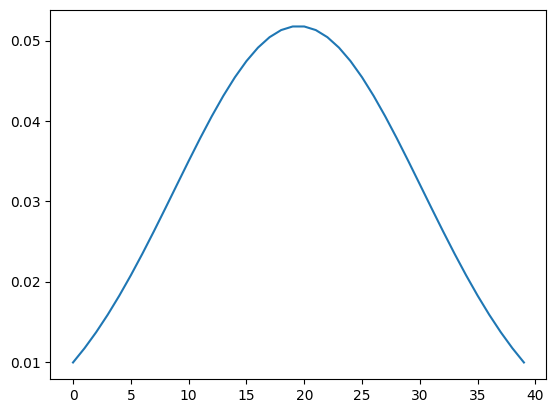

In [3]:
# Problem: American men A and B compared their height, A is taller than B.
# It is given that the population's height follows a normal distribution (178, 7.7).
# Find the distribution of A's height.

import numpy as np
from pmf import Pmf
import pandas as pd
from scipy.stats import norm

<Axes: >

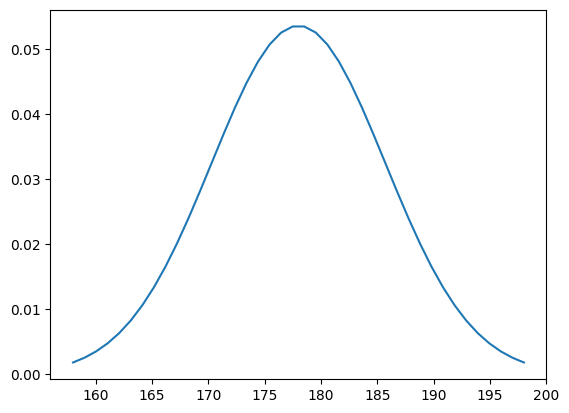

In [65]:
# First, we find the joined distribution of A and B.
qs = np.linspace(178-20, 178+20, 40)
prior = Pmf(norm(178, 7.7).pdf(qs), qs)
prior.normalize()
prior.plot()

In [66]:
# Find the joint distribution
X, Y = np.meshgrid(prior, prior)
print(X)
print(Y)

[[0.0018356  0.00257146 0.00353897 ... 0.00353897 0.00257146 0.0018356 ]
 [0.0018356  0.00257146 0.00353897 ... 0.00353897 0.00257146 0.0018356 ]
 [0.0018356  0.00257146 0.00353897 ... 0.00353897 0.00257146 0.0018356 ]
 ...
 [0.0018356  0.00257146 0.00353897 ... 0.00353897 0.00257146 0.0018356 ]
 [0.0018356  0.00257146 0.00353897 ... 0.00353897 0.00257146 0.0018356 ]
 [0.0018356  0.00257146 0.00353897 ... 0.00353897 0.00257146 0.0018356 ]]
[[0.0018356  0.0018356  0.0018356  ... 0.0018356  0.0018356  0.0018356 ]
 [0.00257146 0.00257146 0.00257146 ... 0.00257146 0.00257146 0.00257146]
 [0.00353897 0.00353897 0.00353897 ... 0.00353897 0.00353897 0.00353897]
 ...
 [0.00353897 0.00353897 0.00353897 ... 0.00353897 0.00353897 0.00353897]
 [0.00257146 0.00257146 0.00257146 ... 0.00257146 0.00257146 0.00257146]
 [0.0018356  0.0018356  0.0018356  ... 0.0018356  0.0018356  0.0018356 ]]


In [67]:
# next we make the joint dataset from two Pmf
def make_joint(pmf1, pmf2):
    X, Y = np.meshgrid(pmf1, pmf2)
    return pd.DataFrame(X * Y, columns=pmf1.qs, index=pmf2.qs)

joint = make_joint(prior, prior)
joint

,158.000000,159.025641,160.051282,161.076923,162.102564,163.128205,164.153846,165.179487,166.205128,167.230769,168.256410,169.282051,170.307692,171.333333,172.358974,173.384615,174.410256,175.435897,176.461538,177.487179,178.512821,179.538462,180.564103,181.589744,182.615385,183.641026,184.666667,185.692308,186.717949,187.743590,188.769231,189.794872,190.820513,191.846154,192.871795,193.897436,194.923077,195.948718,196.974359,198.000000
158.000000,0.000003,0.000005,0.000006,0.000009,0.000012,0.000015,0.000020,0.000025,0.000030,0.000037,0.000044,0.000052,0.000060,0.000068,0.000075,0.000082,0.000088,0.000093,0.000096,0.000098,0.000098,0.000096,0.000093,0.000088,0.000082,0.000075,0.000068,0.000060,0.000052,0.000044,0.000037,0.000030,0.000025,0.000020,0.000015,0.000012,0.000009,0.000006,0.000005,0.000003
159.025641,0.000005,0.000007,0.000009,0.000012,0.000016,0.000021,0.000027,0.000034,0.000043,0.000052,0.000062,0.000073,0.000084,0.000095,0.000105,0.000115,0.000124,0.000130,0.000135,0.000137,0.000137,0.000135,0.000130,0.000124,0.000115,0.000105,0.000095,0.000084,0.000073,0.000062,0.000052,0.000043,0.000034,0.000027,0.000021,0.000016,0.000012,0.000009,0.000007,0.000005
160.051282,0.000006,0.000009,0.000013,0.000017,0.000022,0.000029,0.000038,0.000047,0.000059,0.000071,0.000085,0.000100,0.000115,0.000130,0.000145,0.000158,0.000170,0.000179,0.000186,0.000189,0.000189,0.000186,0.000179,0.000170,0.000158,0.000145,0.000130,0.000115,0.000100,0.000085,0.000071,0.000059,0.000047,0.000038,0.000029,0.000022,0.000017,0.000013,0.000009,0.000006
161.076923,0.000009,0.000012,0.000017,0.000023,0.000030,0.000040,0.000051,0.000064,0.000079,0.000096,0.000115,0.000135,0.000156,0.000176,0.000196,0.000214,0.000230,0.000242,0.000251,0.000256,0.000256,0.000251,0.000242,0.000230,0.000214,0.000196,0.000176,0.000156,0.000135,0.000115,0.000096,0.000079,0.000064,0.000051,0.000040,0.000030,0.000023,0.000017,0.000012,0.000009
162.102564,0.000012,0.000016,0.000022,0.000030,0.000040,0.000053,0.000068,0.000085,0.000105,0.000128,0.000153,0.000179,0.000207,0.000234,0.000260,0.000284,0.000305,0.000322,0.000334,0.000340,0.000340,0.000334,0.000322,0.000305,0.000284,0.000260,0.000234,0.000207,0.000179,0.000153,0.000128,0.000105,0.000085,0.000068,0.000053,0.000040,0.000030,0.000022,0.000016,0.000012
163.128205,0.000015,0.000021,0.000029,0.000040,0.000053,0.000069,0.000088,0.000111,0.000137,0.000167,0.000199,0.000234,0.000270,0.000305,0.000340,0.000371,0.000398,0.000420,0.000435,0.000443,0.000443,0.000435,0.000420,0.000398,0.000371,0.000340,0.000305,0.000270,0.000234,0.000199,0.000167,0.000137,0.000111,0.000088,0.000069,0.000053,0.000040,0.000029,0.000021,0.000015
164.153846,0.000020,0.000027,0.000038,0.000051,0.000068,0.000088,0.000113,0.000142,0.000176,0.000214,0.000256,0.000300,0.000346,0.000391,0.000435,0.000476,0.000511,0.000539,0.000558,0.000568,0.000568,0.000558,0.000539,0.000511,0.000476,0.000435,0.000391,0.000346,0.000300,0.000256,0.000214,0.000176,0.000142,0.000113,0.000088,0.000068,0.000051,0.000038,0.000027,0.000020
165.179487,0.000025,0.000034,0.000047,0.000064,0.000085,0.000111,0.000142,0.000179,0.000222,0.000270,0.000322,0.000378,0.000435,0.000493,0.000548,0.000599,0.000643,0.000678,0.000703,0.000715,0.000715,0.000703,0.000678,0.000643,0.000599,0.000548,0.000493,0.000435,0.000378,0.000322,0.000270,0.000222,0.000179,0.000142,0.000111,0.000085,0.000064,0.000047,0.000034,0.000025
166.205128,0.000030,0.000043,0.000059,0.000079,0.000105,0.000137,0.000176,0.000222,0.000274,0.000334,0.000398,0.000467,0.000539,0.000610,0.000678,0.000741,0.000796,0.000839,0.000870,0.000885,0.000885,0.000870,0.000839,0.000796,0.000741,0.000678,0.000610,0.000539,0.000467,0.000398,0.000334,0.000274,0.000222,0.000176,0.000137,0.000105,0.000079,0.000059,0.000043,0.000030
167.230769,0.000037,0.000052,0.000071,0.000096,0.000128,0.000167,0.000214,0.000270,0.000334,0.000406,0.000484,0.000568,0.000655,0.000741,0.000825,0.000901,0.000967,0.001020,0.001057,0.001076,0.001076,0.001057,0.001020,0.

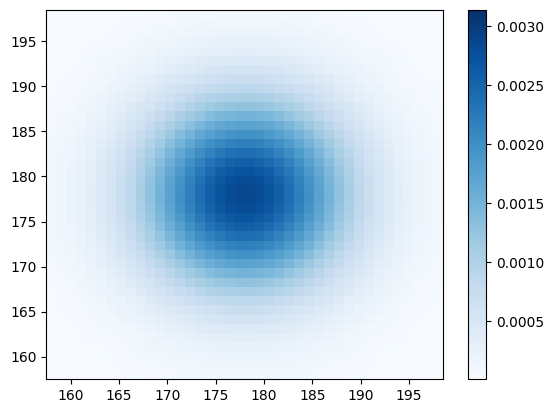

In [68]:
# now we try to plot the joint probability:

import matplotlib.pyplot as plt
def plot_joint(joint, cmap='Blues'):
    """Plot a joint distribution with a color mesh."""
    vmax = joint.to_numpy().max() * 1.1
    plt.pcolormesh(joint.columns, joint.index, joint,
        cmap=cmap,
        vmax=vmax,
        shading='nearest'
    )
    plt.colorbar()

plot_joint(joint)

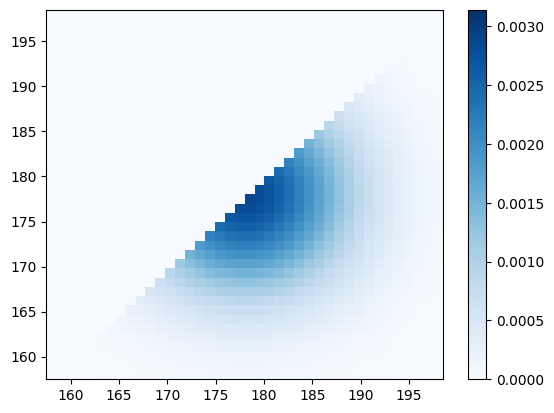

In [69]:
# after the comparison, we know A is larger than B, so we can mask the part of the joint probability where B > A.
A, B = np.meshgrid(joint.columns, joint.index)
likelihood = np.where(A > B, 1, 0)
compared_joint = joint * likelihood
plot_joint(compared_joint)

<Axes: >

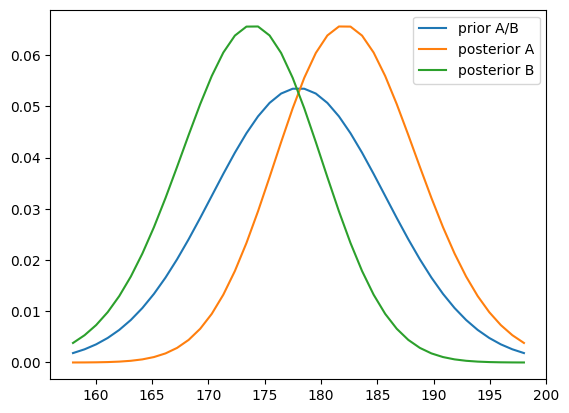

In [70]:
# now let's find the distribution of A after the comparison
prior.plot(label="prior A/B", legend=True)

posterior_A = Pmf(compared_joint.sum(axis=0))
posterior_A.normalize()
posterior_A.plot(label="posterior A", legend=True)


posterior_B = Pmf(compared_joint.sum(axis=1))
posterior_B.normalize()
posterior_B.plot(label="posterior B", legend=True)

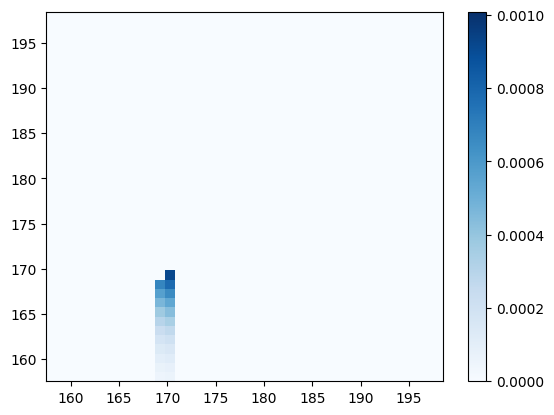

In [96]:
# problem: now suppose we measured A and find he is 170 cm. What does it tell us about B?
# after the comparison, we know A is larger than B, so we can mask the part of the joint probability where B > A.
A, B = np.meshgrid(joint.columns, joint.index)
likelihood = np.where(169 < A, 1, 0)
likelihood *= np.where(A < 171, 1, 0)
# ^ we can't use an exact value because no one is exactly 170 cm, and the data point may even not exist for A == 170

compared_joint_2 = compared_joint * likelihood
plot_joint(compared_joint_2)

<Axes: >

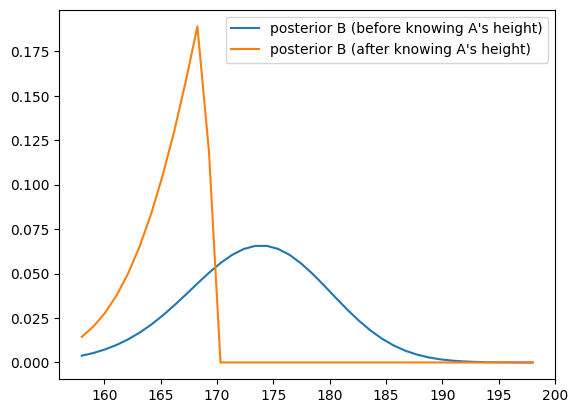

In [97]:
posterior_B.plot(label="posterior B (before knowing A's height)", legend=True)

posterior_B_2 = Pmf(compared_joint_2.sum(axis=1))
posterior_B_2.normalize()
posterior_B_2.plot(label="posterior B (after knowing A's height)", legend=True)

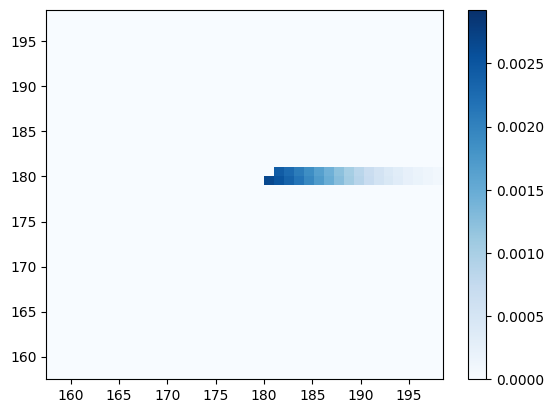

In [100]:
# Exercise: find A's height distribution given B's height is 180

A, B = np.meshgrid(joint.columns, joint.index)
likelihood = np.where(B < 181, 1, 0)
likelihood *= np.where(B > 179, 1, 0)
compared_joint_3 = compared_joint * likelihood
plot_joint(compared_joint_3)

<Axes: >

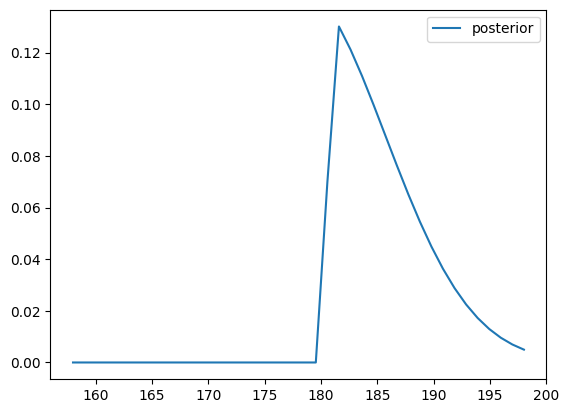

In [102]:
posterior_A_3 = Pmf(compared_joint_3.sum(axis=0))
posterior_A_3.normalize()
posterior_A_3.plot(label="posterior", legend=True)